In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns


In [410]:
ESGCountry_Series = pd.read_csv('ESG Data/ESGCountry-Series.csv')

In [411]:
ESGCountry_Series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,AFG,EG.EGY.PRIM.PP.KD,Sources: Estimated based on UN Energy Statisti...,NaN
1,AFG,EG.ELC.RNEW.ZS,Sources: UN Energy Statistics (2014),NaN
2,AFG,EG.FEC.RNEW.ZS,Sources: UN Energy Statistics (2014),NaN
3,AFG,IT.NET.USER.ZS,Ministry of Communications. Ministry of Commun...,NaN
4,AFG,SM.POP.NETM,Data source: United Nations World Population P...,NaN


In [412]:
print(ESGCountry_Series.DESCRIPTION.unique)

<bound method Series.unique of 0       Sources: Estimated based on UN Energy Statisti...
1                    Sources: UN Energy Statistics (2014)
2                    Sources: UN Energy Statistics (2014)
3       Ministry of Communications. Ministry of Commun...
4       Data source: United Nations World Population P...
                              ...                        
1344    Sources: World Energy Statistics and Balances,...
1345    TelOne. From 2002: Post and Telecommunications...
1346    Data source: United Nations World Population P...
1347    Data source: United Nations World Population P...
1348    Data source: United Nations World Population P...
Name: DESCRIPTION, Length: 1349, dtype: object>


In [413]:
ESGCountry = pd.read_csv('ESG Data/ESGCountry.csv')

In [414]:
ESGCountry.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,NaN,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2017.0,NaN
1,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2017.0,NaN
2,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2017/18",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2017.0,NaN
3,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,NaN,NaN
4,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,NaN


In [415]:
ESGData = pd.read_csv('ESG Data/ESGData.csv')

In [416]:
ESGData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2050,Unnamed: 66
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN,NaN,NaN
2,Arab World,ARB,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.641062,10.437876,6.277652,5.261868,6.385551,8.190277,NaN,NaN,NaN,NaN
3,Arab World,ARB,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.055593,0.079402,0.086177,0.076670,0.085885,0.047916,NaN,NaN,NaN,NaN
4,Arab World,ARB,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,27.835643,27.826564,27.845522,27.847925,27.866972,...,36.534503,36.607475,36.624759,36.610850,NaN,NaN,NaN,NaN,NaN,NaN


In [417]:
ESGFootNote = pd.read_csv('ESG Data/ESGFootNote.csv')

In [418]:
ESGFootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,AFG,IT.NET.USER.ZS,YR1990,Source: Ministry of Communications.,NaN
1,AFG,IT.NET.USER.ZS,YR2001,Source: ITU estimate.,NaN
2,AFG,IT.NET.USER.ZS,YR2002,Source: Ministry of Communications.,NaN
3,AFG,IT.NET.USER.ZS,YR2003,Source: Ministry of Communications.,NaN
4,AFG,IT.NET.USER.ZS,YR2004,Source: Ministry of Communications.,NaN


In [419]:
ESGSeries_Time = pd.read_csv('ESG Data/ESGSeries-Time.csv')

In [420]:
ESGSeries_Time.head()

,SeriesCode,Year,DESCRIPTION,Unnamed: 3
0,SM.POP.NETM,YR1962,The data refer to five-year periods running fr...,NaN
1,SM.POP.NETM,YR1967,The data refer to five-year periods running fr...,NaN
2,SM.POP.NETM,YR1972,The data refer to five-year periods running fr...,NaN
3,SM.POP.NETM,YR1977,The data refer to five-year periods running fr...,NaN
4,SM.POP.NETM,YR1982,The data refer to five-year periods running fr...,NaN


In [421]:
ESGSeries = pd.read_csv('ESG Data/ESGSeries.csv')

In [422]:
ESGSeries.head(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
1,AG.LND.FRST.ZS,Environment: Land use,Forest area (% of land area),NaN,Forest area is land under natural or planted s...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Forest is determined both by the presence of t...,"As threats to biodiversity mount, the internat...",NaN,NaN,NaN,CC BY-4.0,NaN
2,AG.PRD.FOOD.XD,Environment: Agricultural production,Food production index (2004-2006 = 100),NaN,Food production index covers food crops that a...,NaN,Annual,2004-06,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",The agricultural production index is prepared ...,The commodities covered in the computation of ...,NaN,NaN,NaN,CC BY-4.0,NaN
3,CC.EST,Governance: Stability & Rule of Law,Control of Corruption: Estimate,NaN,Control of Corruption captures perceptions of ...,NaN,Annual,NaN,NaN,NaN,...,NaN,NaN,"Detailed documentation of the WGI, interactive...",NaN,NaN,NaN,NaN,NaN,CC BY-4.0,NaN
4,EG.CFT.ACCS.ZS,Environment: Energy production & use,Access to clean fuels and technologies for coo...,NaN,Access to clean fuels and technologies for coo...,NaN,Annual,NaN,NaN,Weighted Average,...,NaN,NaN,"World Bank, Sustainable Energy for All (SE4ALL...",Data for access to clean fuels and technologie...,NaN,NaN,NaN,NaN,CC BY-4.0,NaN


In [423]:
ESGCountry_Cols = ESGCountry.columns
print(ESGCountry_Cols)


Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data', 'Unnamed: 30'],
      dtype='object')


In [424]:
ESGData.loc[ESGData['Country Name'] == 'Angola']

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2050,Unnamed: 66
3350,Angola,AGO,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,46.150000,46.670000,47.360000,48.050000,NaN,NaN,NaN,NaN,NaN,NaN
3351,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,36.872383,32.000000,42.000000,40.668018,41.962894,43.259258,NaN,NaN,NaN,NaN
3352,Angola,AGO,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,25.582519,19.595669,8.765673,8.695937,13.419771,21.918984,NaN,NaN,NaN,NaN
3353,Angola,AGO,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.265880,0.269142,0.349607,0.405844,0.358292,0.319364,NaN,NaN,NaN,NaN
3354,Angola,AGO,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,45.857063,45.881126,45.897169,45.921232,45.937274,...,47.477340,47.477340,47.477340,47.477340,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,Angola,AGO,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
3413,Angola,AGO,Terrestrial and marine protected areas (% of t...,ER.PTD.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.004713,5.004711,5.004711,NaN,NaN,NaN,NaN
3414,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.380000,7.310000,7.260000,7.200000,7.100000,7.000000,6.930000,7.7,NaN,NaN
3415,Angola,AGO,Unmet need for contraception (% of married wom...,SP.UWT.TFRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [425]:
ESGData.loc[ESGData['Indicator Name'] == 'Access to electricity (% of population)'] 

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2050,Unnamed: 66
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN,NaN,NaN
68,Caribbean small states,CSS,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,94.976770,94.960343,95.744149,97.101675,97.767418,98.401602,NaN,NaN,NaN,NaN
135,Central Europe and the Baltics,CEB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,99.827835,100.000000,100.000000,NaN,NaN,NaN,NaN
202,Early-demographic dividend,EAR,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.895032,82.970357,85.746426,87.275126,89.616826,90.724652,NaN,NaN,NaN,NaN
269,East Asia & Pacific,EAS,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,96.594308,96.734874,97.128749,97.262121,97.857123,97.986434,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15679,"Venezuela, RB",VEN,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,99.234581,100.000000,100.000000,99.400000,99.200000,100.000000,NaN,NaN,NaN,NaN
15746,Vietnam,VNM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,99.000992,99.200000,99.799393,99.200000,100.000000,100.000000,NaN,NaN,NaN,NaN
15813,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,75.600000,66.100000,71.179886,70.856285,79.200000,62.000000,NaN,NaN,NaN,NaN
15880,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,28.014929,27.900000,31.100000,35.307339,40.300000,39.812622,NaN,NaN,NaN,NaN


**Basic Analysis**

There are 239 different countries and 67 social, economic, and enviromental indicators for each country

In [426]:
def get_graph_countries(indicator):
    df = ESGData.loc[ESGData['Indicator Name'] == indicator].reset_index(drop=True)
    for index,row in df.iterrows():
        if(index <= 45):
            continue
        foo = row.iloc[4:].dropna()
        foo.name = row['Country Name']
        foo = foo.to_frame()
        foo = foo.reset_index()
        foo['index'] = pd.to_datetime(foo['index'])
        print(foo)
        # print(index)
        # foo.plot.scatter('index',row['Country Name'])

def get_indicator_count(indicator):
    df = ESGData.loc[ESGData['Indicator Name'] == indicator].reset_index(drop=True)
    count = 0
    for index,row in df.iterrows():
        if(index <= 45 or row.iloc[4:].dropna().empty):
            continue
        count += 1
    return count

In [427]:
ESGData['Indicator Name'].unique()

array(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Adjusted savings: natural resources depletion (% of GNI)',
       'Adjusted savings: net forest depletion (% of GNI)',
       'Agricultural land (% of land area)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Annualized average growth rate in per capita real survey mean consumption or income, total population (%)',
       'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
       'Children in employment, total (% of children ages 7-14)',
       'CO2 emissions (metric tons per capita)',
       'Control of Corruption: Estimate',
       'Cooling Degree Days (projected change in number of degree Celsius)',
       'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       'E

In [428]:
indicator_counts = {}
for i in ESGData['Indicator Name'].unique():
    indicator_counts[i] = get_indicator_count(i)

In [429]:
print(indicator_counts)


{'Access to clean fuels and technologies for cooking (% of population)': 189, 'Access to electricity (% of population)': 193, 'Adjusted savings: natural resources depletion (% of GNI)': 180, 'Adjusted savings: net forest depletion (% of GNI)': 181, 'Agricultural land (% of land area)': 190, 'Agriculture, forestry, and fishing, value added (% of GDP)': 189, 'Annual freshwater withdrawals, total (% of internal resources)': 175, 'Annualized average growth rate in per capita real survey mean consumption or income, total population (%)': 91, 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)': 183, 'Children in employment, total (% of children ages 7-14)': 100, 'CO2 emissions (metric tons per capita)': 191, 'Control of Corruption: Estimate': 191, 'Cooling Degree Days (projected change in number of degree Celsius)': 193, 'Droughts, floods, extreme temperatures (% of population, average 1990-2009)': 165, 'Ease of doing business index (1=most

In [430]:
def get_time_range(indicator,country):
    df = ESGData.loc[(ESGData['Indicator Name'] == indicator) & (ESGData['Country Name'] == country)]
    df = df.iloc[0,4:].squeeze().dropna()
    return (df.index.min(), df.index.max())
    

In [431]:
print(get_time_range('Access to electricity (% of population)','United States'))
print(get_time_range('CO2 emissions (metric tons per capita)','United States'))
print(get_time_range('GDP growth (annual %)','United States'))
print(get_time_range('Fossil fuel energy consumption (% of total)','United States'))
print(get_time_range('Unemployment, total (% of total labor force) (modeled ILO estimate)','United States'))
print(get_time_range('Unemployment, total (% of total labor force) (modeled ILO estimate)','United States'))

('1990', '2018')
('1960', '2016')
('1961', '2019')
('1960', '2015')
('1991', '2020')
('1991', '2020')


In [432]:
get_graph_countries('Access to electricity (% of population)')

        index Afghanistan
0  2005-01-01        23.0
1  2006-01-01   28.560974
2  2007-01-01   34.253246
3  2008-01-01        42.4
4  2009-01-01   45.670555
5  2010-01-01        42.7
6  2011-01-01   43.222019
7  2012-01-01        69.1
8  2013-01-01   68.933266
9  2014-01-01        89.5
10 2015-01-01        71.5
11 2016-01-01        97.7
12 2017-01-01        97.7
13 2018-01-01   98.713203
       index Albania
0 2012-01-01    99.9
1 2013-01-01   100.0
2 2014-01-01   100.0
3 2015-01-01   100.0
4 2016-01-01   100.0
5 2017-01-01   100.0
6 2018-01-01   100.0
       index    Algeria
0 2009-01-01  98.747269
1 2010-01-01  98.877625
2 2011-01-01  99.049789
3 2012-01-01   98.76466
4 2013-01-01  99.538582
5 2014-01-01   99.84082
6 2015-01-01  99.931366
7 2016-01-01  99.990051
8 2017-01-01      100.0
9 2018-01-01      100.0
        index Andorra
0  1990-01-01   100.0
1  1991-01-01   100.0
2  1992-01-01   100.0
3  1993-01-01   100.0
4  1994-01-01   100.0
5  1995-01-01   100.0
6  1996-01-01   100.0
7 

In [433]:
def get_country_indicator_graph(indicator,country):
    df = ESGData.loc[(ESGData['Indicator Name'] == indicator) & (ESGData['Country Name'] == country)]
    df = df.iloc[0,4:].squeeze().dropna()
    df.name = country
    df = df.to_frame()
    df = df.reset_index()
    # df = df.rename(columns = {df.columns[0] : "Time", df.columns[1] : country})
    df['index'] = pd.to_datetime(df['index'])
    df.plot.scatter('index',country)
    df = df.set_index("index")
    df = df.to_period('Y')
    return df
    
    

,United States
index,
1961,2.3
1962,6.1
1963,4.4
1964,5.8
1965,6.4
1966,6.5
1967,2.5
1968,4.8
1969,3.1


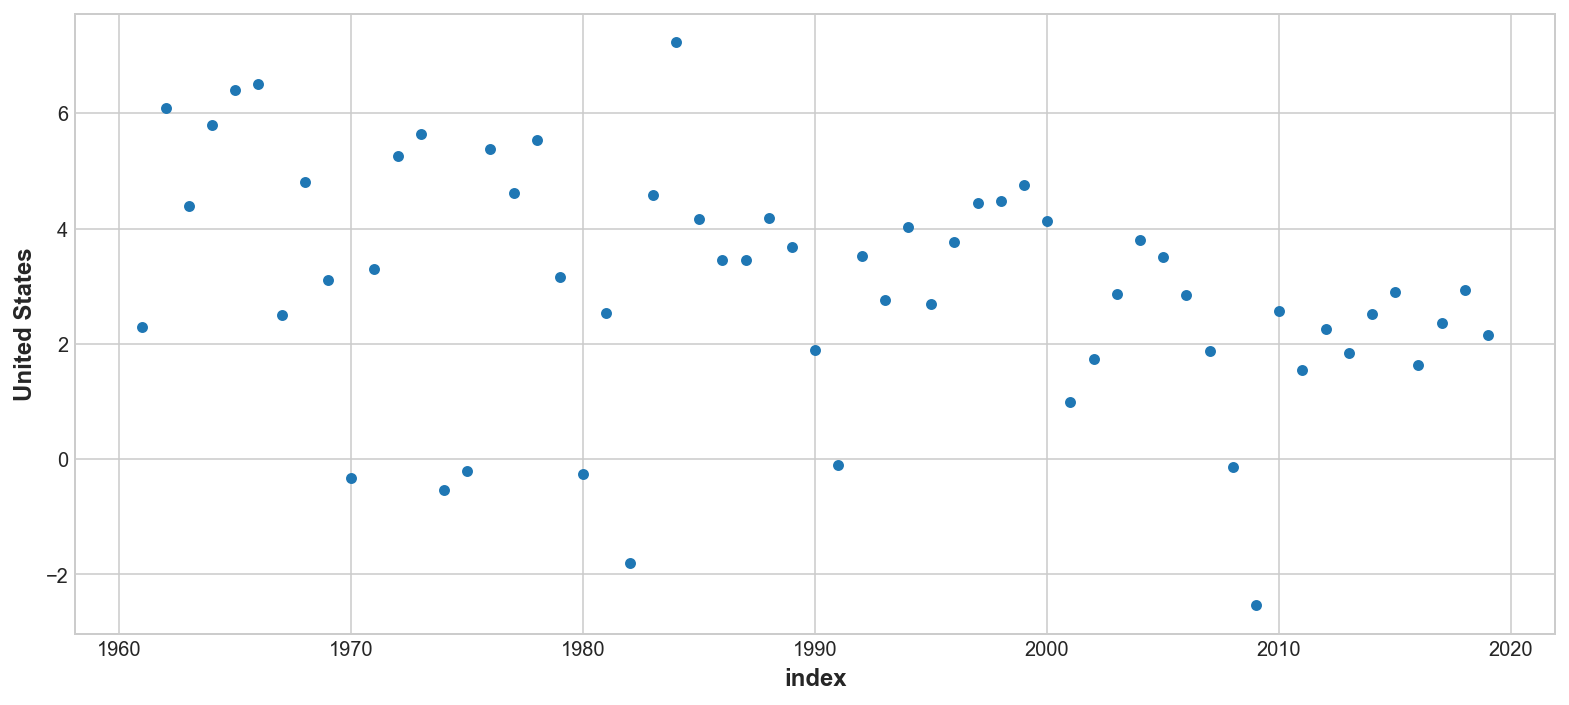

In [434]:
get_country_indicator_graph('GDP growth (annual %)','United States')

In [435]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

**Time Series Modeling XGBoost + Polynomial Regression**

      United States
index              
1961            2.3
1962            6.1
1963            4.4
1964            5.8
1965            6.4
1966            6.5
1967            2.5
1968            4.8
1969            3.1
1970      -0.322761
1971       3.293362
1972       5.258895
1973       5.645719
1974      -0.540547
1975      -0.205464
1976       5.388139
1977       4.624159
1978       5.535303
1979        3.16615
1980      -0.256752
1981       2.537719
1982      -1.802874
1983       4.583927
1984        7.23662
1985       4.169656
1986       3.462652
1987       3.459573
1988       4.177046
1989       3.672656
1990        1.88596
1991      -0.108259
1992       3.522442
1993       2.752844
1994       4.028839
1995       2.684287
1996       3.772501
1997       4.447216
1998       4.481408
1999       4.753236
2000       4.127484
2001       0.998341
2002       1.741695
2003       2.861211
2004       3.798891
2005       3.513214
2006       2.854972
2007       1.876171
2008       -0.13658


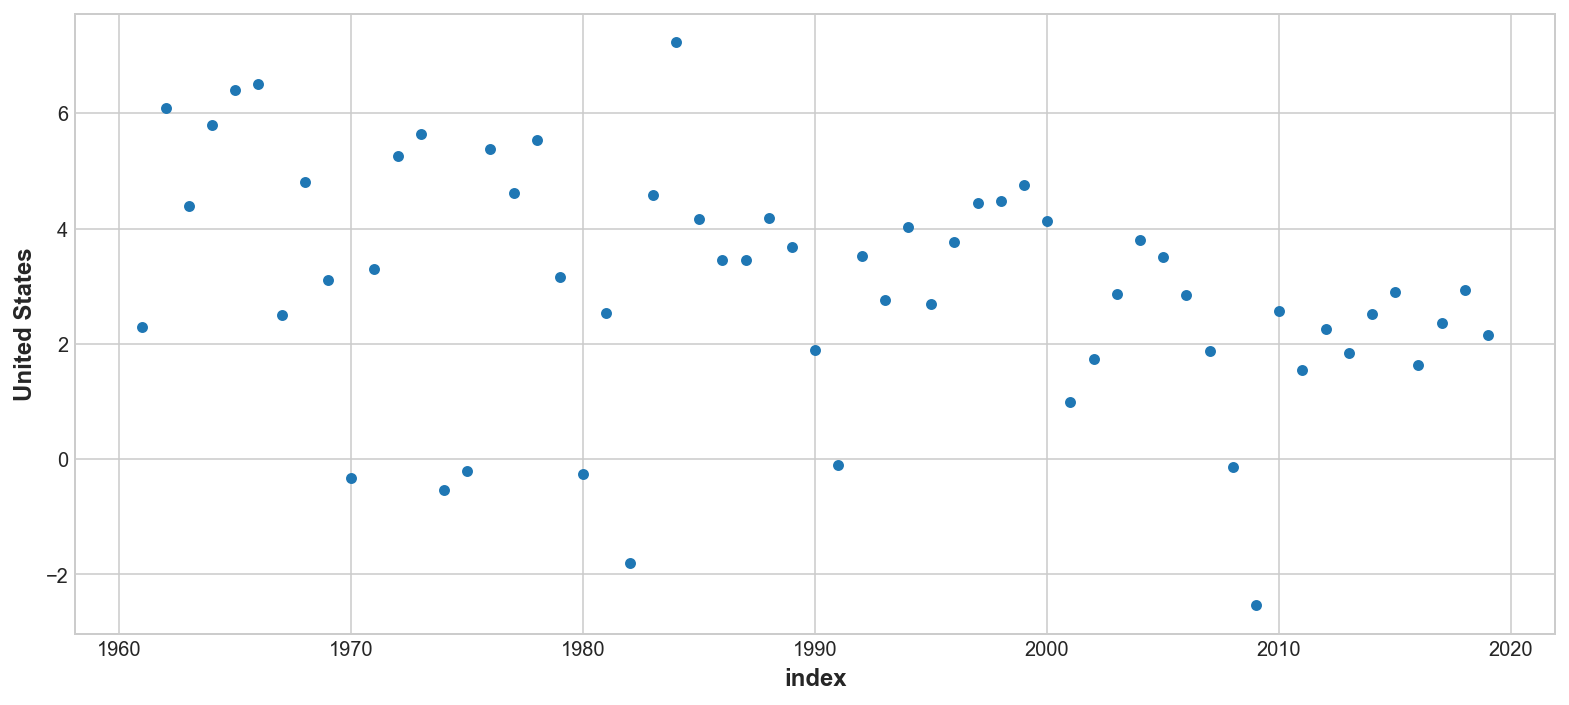

In [462]:
import math
from statsmodels.tsa.deterministic import DeterministicProcess
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib.offsetbox import AnchoredText

y_gdp = get_country_indicator_graph('GDP growth (annual %)','United States')
dp = DeterministicProcess(
    index=y.index,  # dates from the training data
    constant=True,  # the intercept
    order=1,        # linear trend
    drop=True,      # drop terms to avoid collinearity
)
X = dp.in_sample()
print(y_gdp)

C:\Users\kkalathur\AppData\Local\Temp\ipykernel_33380\1772207860.py:25: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_test.plot(color='0.25', subplots=True, sharex=True, ax=axs)
C:\Users\kkalathur\AppData\Local\Temp\ipykernel_33380\1772207860.py:26: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_fit.plot(color='C0', subplots=True, sharex=True, ax=axs)
C:\Users\kkalathur\AppData\Local\Temp\ipykernel_33380\1772207860.py:27: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_pred.plot(color='C3', subplots=True, sharex=True, ax=axs)


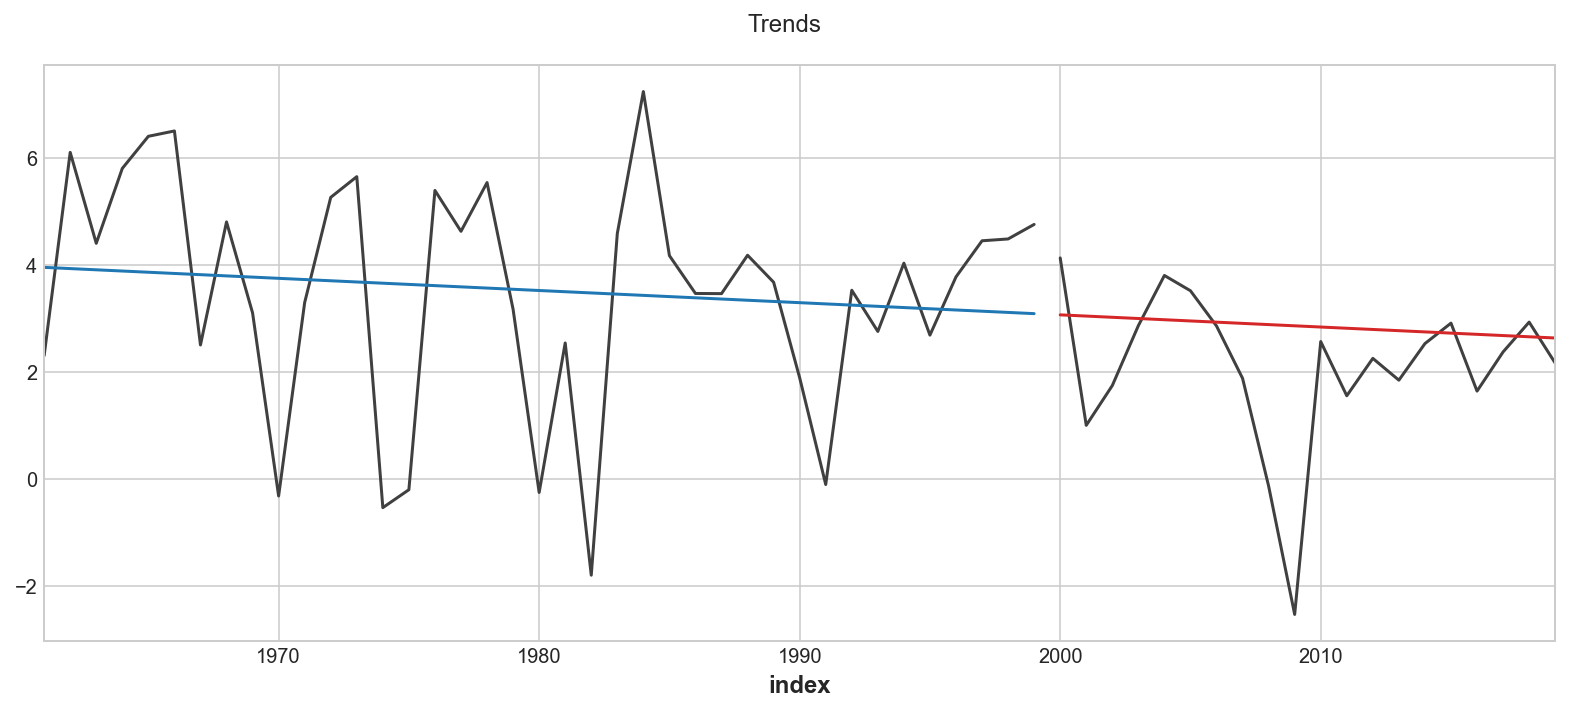

In [463]:
idx_train, idx_test = train_test_split(
    y_gdp.index, test_size=20, shuffle=False,
)
X_train, X_test = X.loc[idx_train, :], X.loc[idx_test, :]
y_train, y_test = y_gdp.loc[idx_train], y_gdp.loc[idx_test]

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

# Make predictions
y_fit = pd.DataFrame(
    model.predict(X_train),
    index=y_train.index,
    columns=y_train.columns,
)
y_pred = pd.DataFrame(
    model.predict(X_test),
    index=y_test.index,
    columns=y_test.columns,
)
# print(y_train)
# print(y_fit)
# Plot
axs = y_train.plot(color='0.25', subplots=True, sharex=True)
axs = y_test.plot(color='0.25', subplots=True, sharex=True, ax=axs)
axs = y_fit.plot(color='C0', subplots=True, sharex=True, ax=axs)
axs = y_pred.plot(color='C3', subplots=True, sharex=True, ax=axs)
for ax in axs: ax.legend([])
_ = plt.suptitle("Trends")

In [464]:
# We use XGBoost to train on the residuals of the linear regression model
# print(X)
X_train, X_test = X.loc[idx_train]['trend'].values.reshape(-1,1), X.loc[idx_test]['trend'].values.reshape(-1,1)
y_train, y_test = y_gdp.loc[idx_train].values, y_gdp.loc[idx_test].values
y_fit = y_fit.values # trend from training set
y_pred = y_pred.values # trend from test set

print(y_fit)

# Create residuals (the collection of detrended series) from the training set
y_resid = y_train - y_fit


# Train XGBoost on the residuals
boost = xgb.XGBRegressor(n_estimators = 500, early_stopping_rounds = 50, learning_rate = 0.01)
boost.fit(X_train, y_resid,
          eval_set = [(X_train, y_train),(X_test, y_test)],
          verbose = True)

# Add the predicted residuals onto the predicted trends
y_fit_boosted = boost.predict(X_train) + y_fit.flatten()
y_pred_boosted = boost.predict(X_test) + y_pred.flatten()
# y_fit_boosted = boost.predict(X_train)
# y_pred_boosted = boost.predict(X_test)


[[3.95042984]
 [3.92767261]
 [3.90491538]
 [3.88215815]
 [3.85940091]
 [3.83664368]
 [3.81388645]
 [3.79112922]
 [3.76837199]
 [3.74561476]
 [3.72285753]
 [3.70010029]
 [3.67734306]
 [3.65458583]
 [3.6318286 ]
 [3.60907137]
 [3.58631414]
 [3.5635569 ]
 [3.54079967]
 [3.51804244]
 [3.49528521]
 [3.47252798]
 [3.44977075]
 [3.42701352]
 [3.40425628]
 [3.38149905]
 [3.35874182]
 [3.33598459]
 [3.31322736]
 [3.29047013]
 [3.2677129 ]
 [3.24495566]
 [3.22219843]
 [3.1994412 ]
 [3.17668397]
 [3.15392674]
 [3.13116951]
 [3.10841227]
 [3.08565504]]
[12:19:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	va

<AxesSubplot:xlabel='index'>

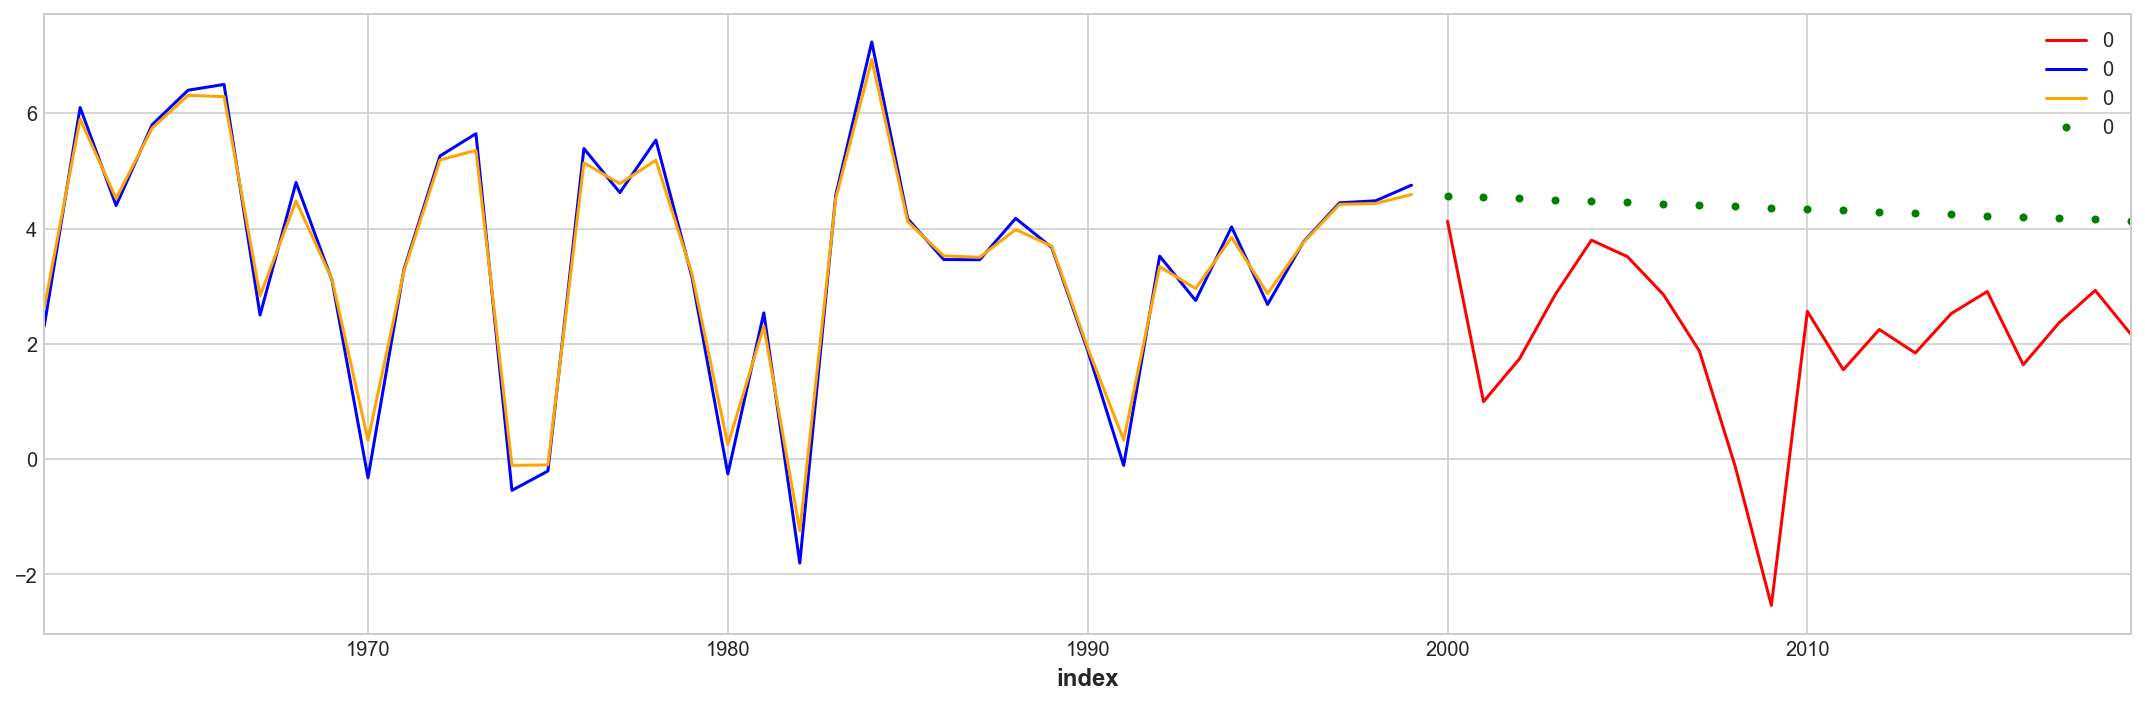

In [465]:
fig, ax = plt.subplots(figsize = (15,5))
pd.DataFrame(index = y_gdp.loc[idx_test].index, data = y_test.flatten()).plot(ax = ax, color='red')
pd.DataFrame(index = y_gdp.loc[idx_train].index,data = y_train.flatten()).plot(ax = ax, color='blue')
pd.DataFrame(index = y_gdp.loc[idx_train].index,data = y_fit_boosted.flatten()).plot(ax = ax, color='orange')
pd.DataFrame(index = y_gdp.loc[idx_test].index,data = y_pred_boosted.flatten()).plot(ax = ax, color='green',style = '.')



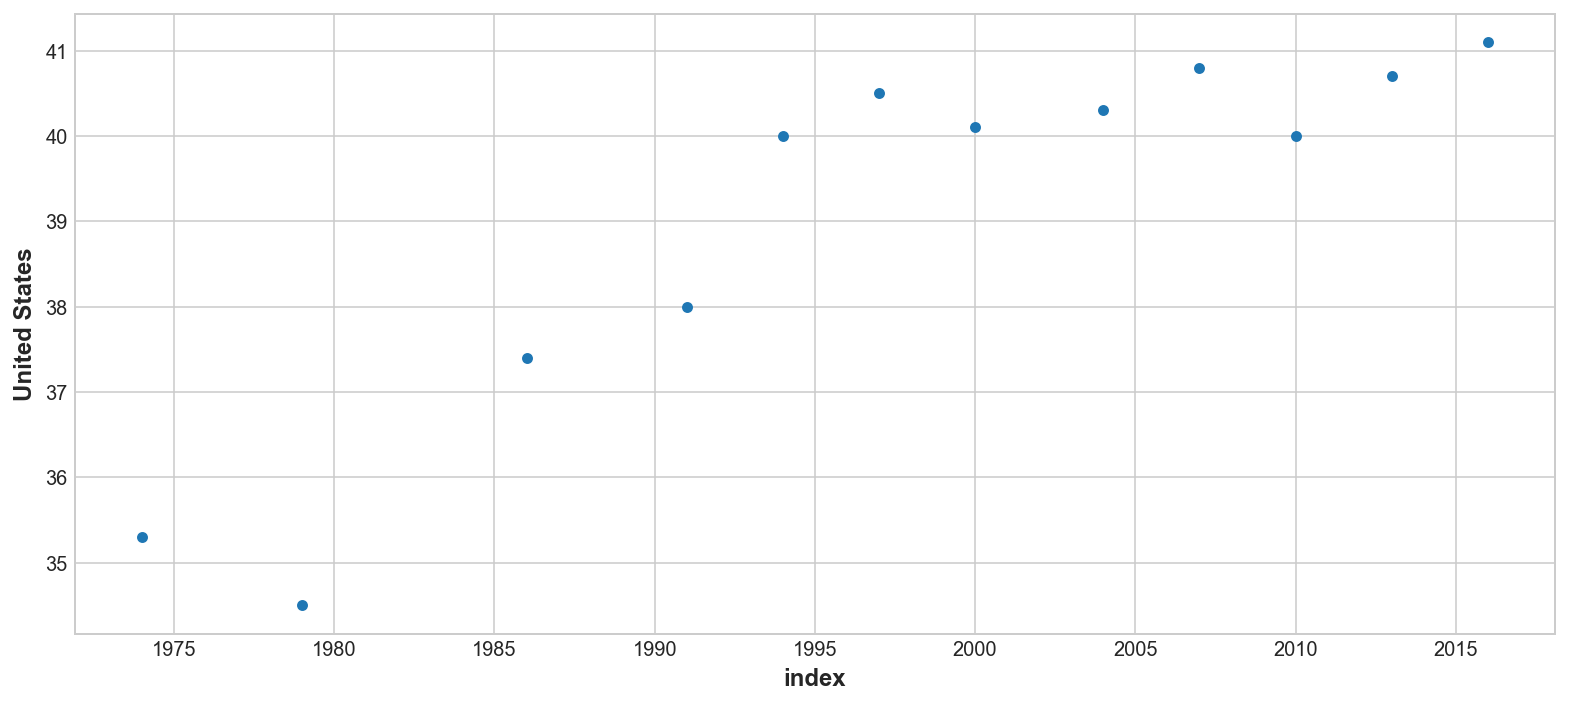

In [514]:
# y_gini = get_country_indicator_graph('Gini index (World Bank estimate)','United States')
# y_stability = get_country_indicator_graph('Political Stability and Absence of Violence/Terrorism: Estimate','United States')
# y_law = get_country_indicator_graph('Rule of Law: Estimate','United States')

#y_pop = get_country_indicator_graph('Population density (people per sq. km of land area)','United States')

In [498]:
x_ = y_gdp['United States'].shift(2).fillna(0.0)
y_ = y_gdp['United States']
# print(x_)
corr = np.corrcoef(x_.to_numpy().astype(float),y_.to_numpy().astype(float))
print(corr)

[[ 1.         -0.03500524]
 [-0.03500524  1.        ]]


**Using Lag features and population density as features**

In [594]:
def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    x_ = x.shift(lag).fillna(0.0)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = np.corrcoef(y_.to_numpy().astype(float),x_.to_numpy().astype(float))[0,1]
    # corr = y_.corr(method='pearson')
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax

def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

c:\Users\kkalathur\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


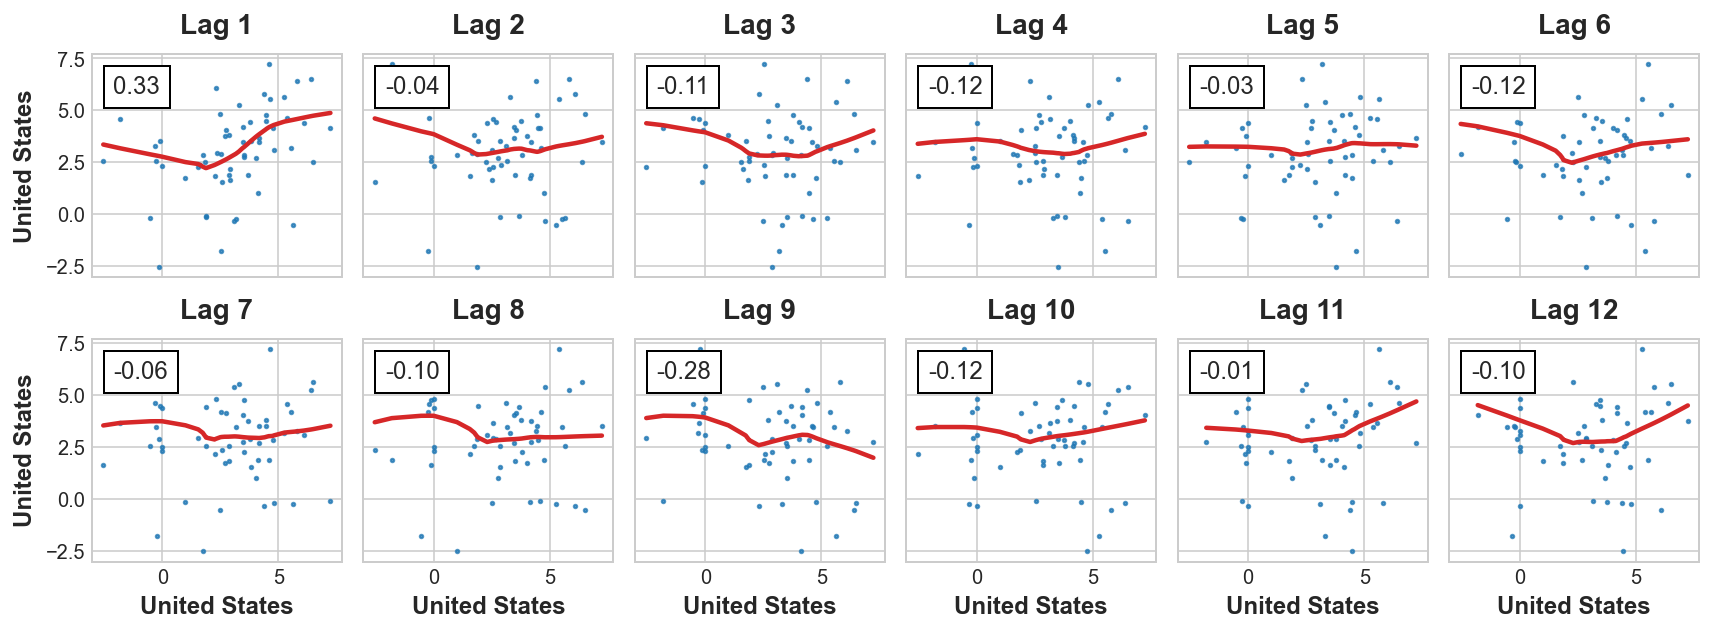

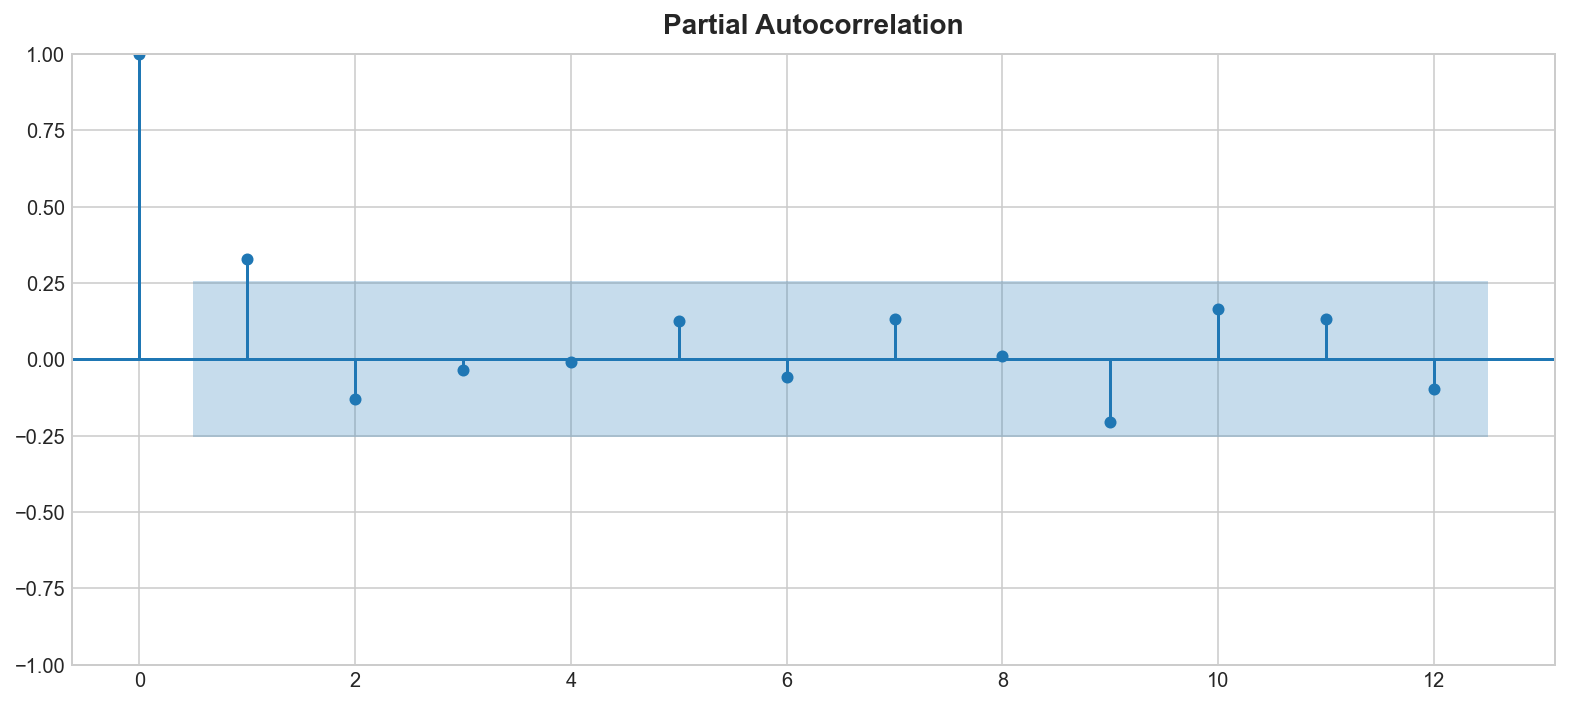

In [595]:
_ = plot_lags(y_gdp['United States'], lags=12, nrows=2)
_ = plot_pacf(y_gdp['United States'], lags=12)

Based on autocorrelation plot, using multiple lags will probably not improve predictive power; we will stick to using a shift 1 lag.

In [596]:
def make_lags(df, lags):
    return pd.concat(
        {
            f'y_lag_{i}': df.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1
    )

X = pd.concat([pd.DataFrame(np.arange(59),index = y_gdp.index,columns = ['time-step']),make_lags(y_gdp['United States'], lags=1)],axis = 1)
X = X.fillna(0.0)
X

,time-step,y_lag_1
index,,
1961,0,0.000000
1962,1,2.300000
1963,2,6.100000
1964,3,4.400000
1965,4,5.800000
1966,5,6.400000
1967,6,6.500000
1968,7,2.500000
1969,8,4.800000


In [597]:
y = y_gdp['United States'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=15, shuffle=False)

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

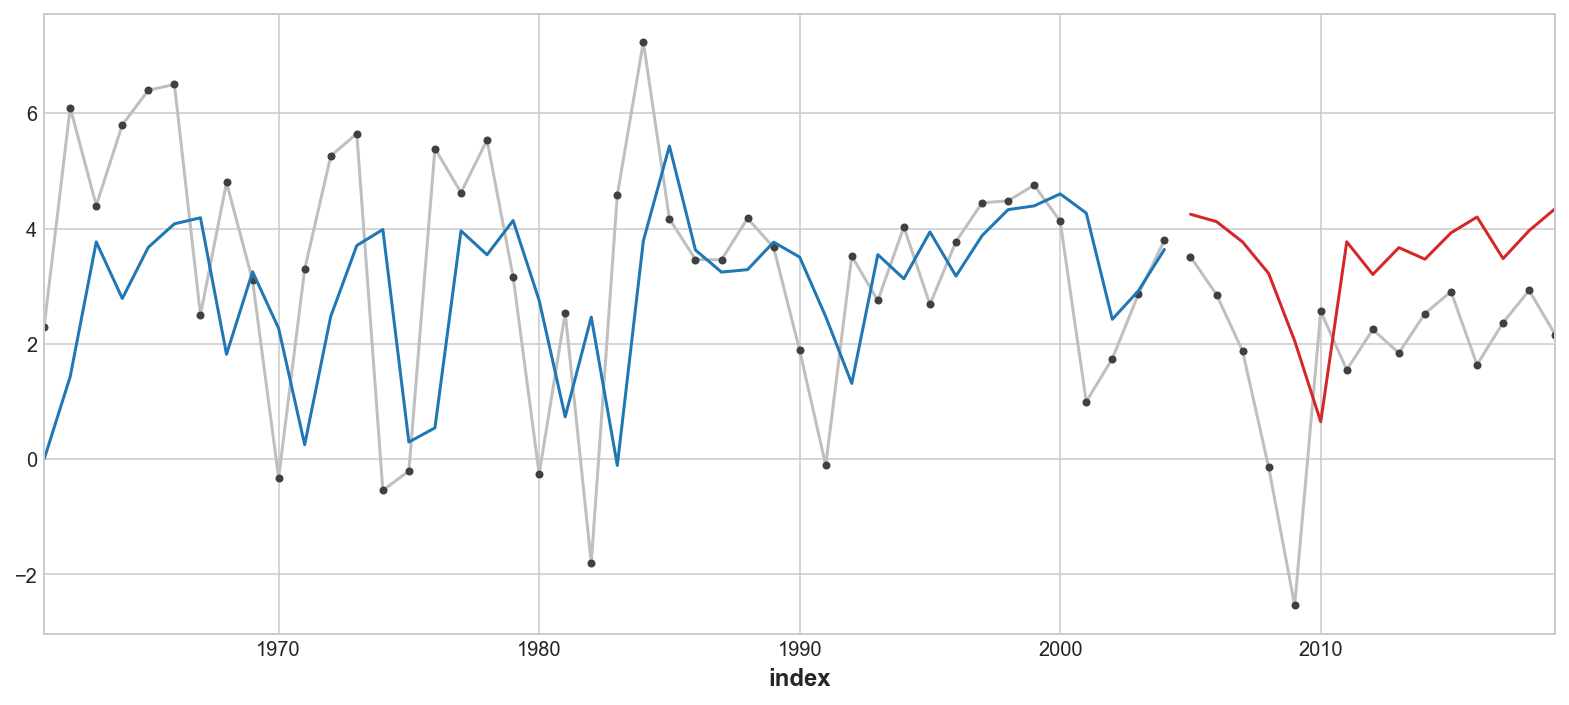

In [598]:
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

ax = y_train.plot(**plot_params)
ax = y_test.plot(**plot_params)
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')

Adding XGBoost to predict residuals

In [599]:
# We use XGBoost to train on the residuals of the linear regression model
# print(X)
X_train, X_test = X_train.values.reshape(-1,2), X_test.values.reshape(-1,2)
y_tr, y_te = y_train.copy().values, y_test.copy().values
y_pre = y_pred.copy().values # trend from training set
y_for = y_fore.copy().values # trend from test set

print(y_train)

# Create residuals (the collection of detrended series) from the training set
y_resid = y_tr - y_pre

# Train XGBoost on the residuals
boost = xgb.XGBRegressor(n_estimators = 400, early_stopping_rounds = 50, learning_rate = 0.01)
boost.fit(X_train, y_resid,
          eval_set = [(X_train, y_tr),(X_test, y_te)],
          verbose = True)

# Add the predicted residuals onto the predicted trends
y_pred_boosted = boost.predict(X_train) + y_pre.flatten()
y_fore_boosted = boost.predict(X_test) + y_for.flatten()
# y_fit_boosted = boost.predict(X_train)
# y_pred_boosted = boost.predict(X_test)

index
1961         2.3
1962         6.1
1963         4.4
1964         5.8
1965         6.4
1966         6.5
1967         2.5
1968         4.8
1969         3.1
1970   -0.322761
1971    3.293362
1972    5.258895
1973    5.645719
1974   -0.540547
1975   -0.205464
1976    5.388139
1977    4.624159
1978    5.535303
1979     3.16615
1980   -0.256752
1981    2.537719
1982   -1.802874
1983    4.583927
1984     7.23662
1985    4.169656
1986    3.462652
1987    3.459573
1988    4.177046
1989    3.672656
1990     1.88596
1991   -0.108259
1992    3.522442
1993    2.752844
1994    4.028839
1995    2.684287
1996    3.772501
1997    4.447216
1998    4.481408
1999    4.753236
2000    4.127484
2001    0.998341
2002    1.741695
2003    2.861211
2004    3.798891
Freq: A-DEC, Name: United States, dtype: object
[13:43:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a f

<AxesSubplot:xlabel='index'>

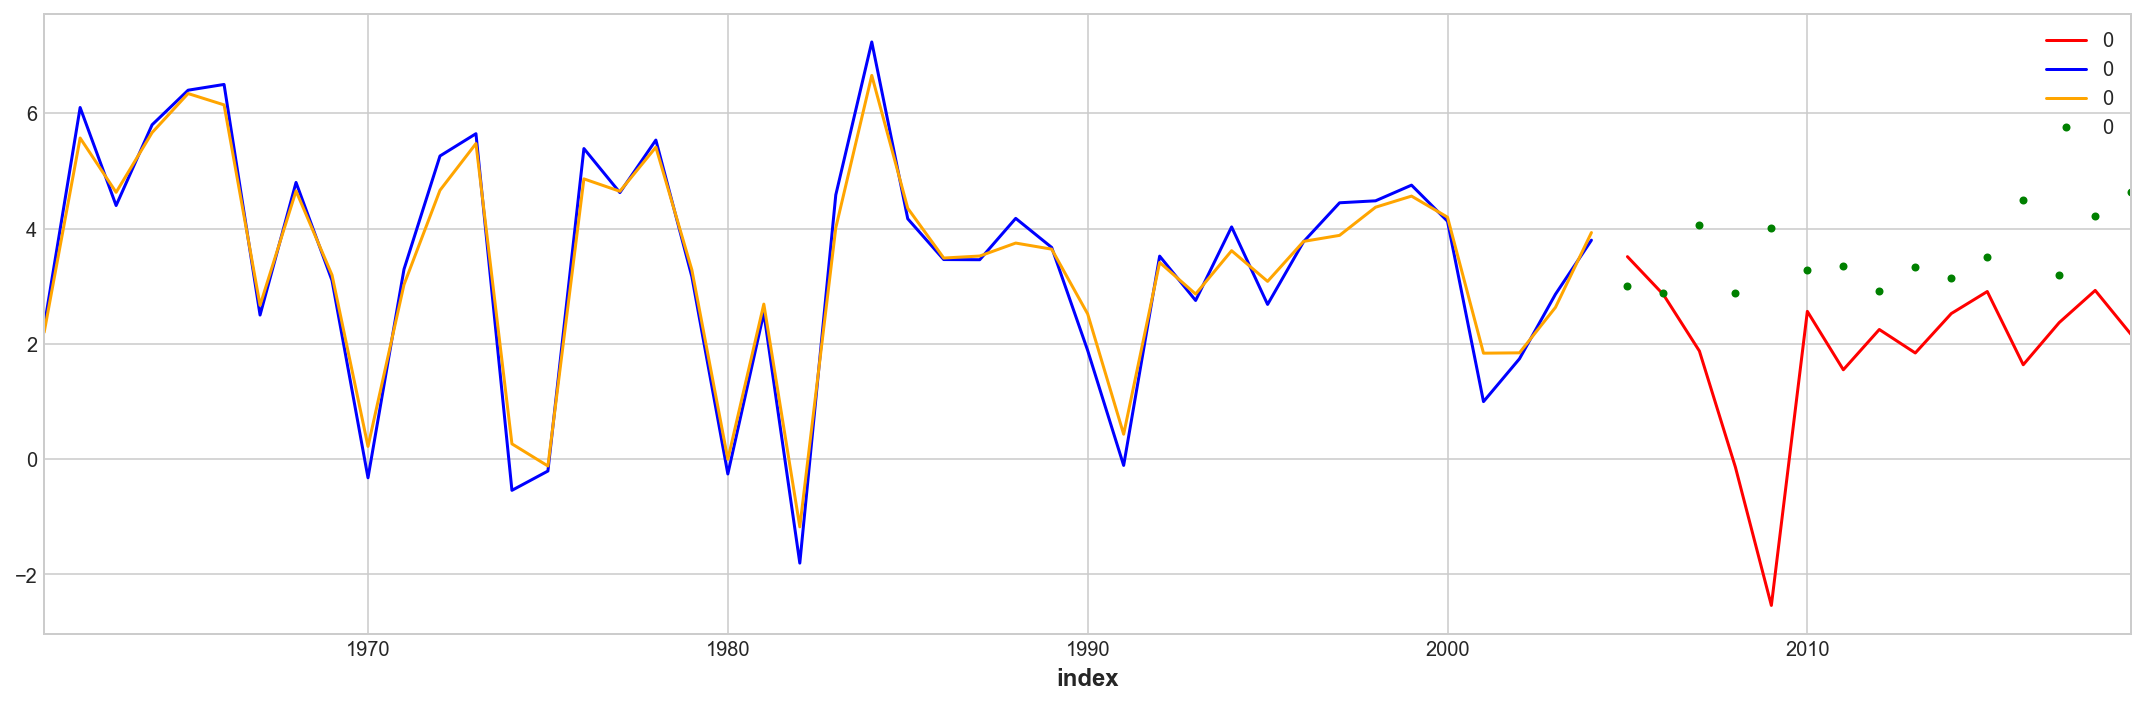

In [600]:
fig, ax = plt.subplots(figsize = (15,5))
pd.DataFrame(index = y_test.index, data = y_te.flatten()).plot(ax = ax, color='red')
pd.DataFrame(index = y_train.index,data = y_tr.flatten()).plot(ax = ax, color='blue')
pd.DataFrame(index = y_train.index,data = y_pred_boosted.flatten()).plot(ax = ax, color='orange')
pd.DataFrame(index = y_test.index,data = y_fore_boosted.flatten()).plot(ax = ax, color='green',style = '.')